In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

In [2]:
sns.set_style('whitegrid')
sns.set_palette('muted')

plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size

## Regression

In [3]:
regression = pd.read_csv('Results/gridsearch_regression_500_epochs_diff_lambda_512_batch_size.csv')
regression_sigmoid = pd.read_csv('Results/gridsearch_regression_500_epochs_sigmoid.csv')

In [5]:
### Adding in the extra values for sigmoid activation

rows_to_add = regression_sigmoid

# insertion point
insertion_point = 12

# Split the dataframe into two parts
before = regression.iloc[:insertion_point, :]
after = regression.iloc[insertion_point:, :]

# Concatenate the parts along with the rows to add
regression = pd.concat([before, rows_to_add, after], ignore_index=True)

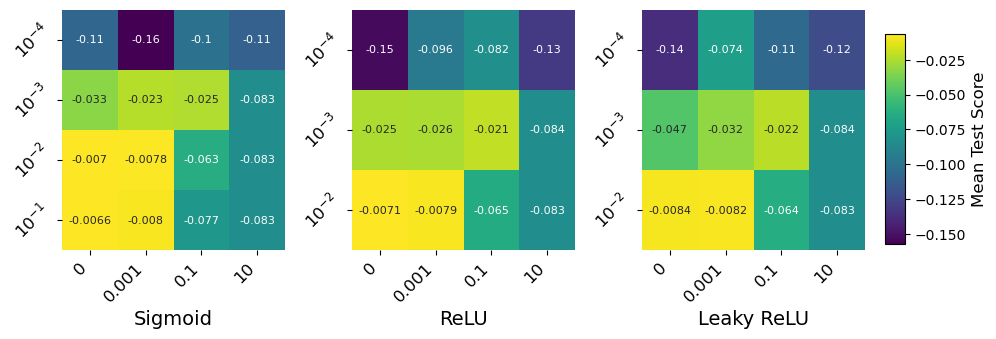

In [9]:
# Epsilon and lambda values
activation_funcs = ["['sigmoid', 'identity']", "['relu', 'identity']", "['leaky_relu', 'identity']"]
act_func_name = ['Sigmoid', 'ReLU', 'Leaky ReLU']

# List to collect all data for normalization
all_data = []

# Collect all data to find the global min and max for normalization
for act in activation_funcs:
    if act == "['sigmoid', 'identity']":
        epsilon_vs_lambda = regression[(regression['param_model__activations'] == act)]
        epsilon_vs_lambda_array = epsilon_vs_lambda['mean_test_score'].to_numpy().reshape(4, 4)
        all_data.append(epsilon_vs_lambda_array)
    else:
        epsilon_vs_lambda = regression[(regression['param_model__activations'] == act)]
        epsilon_vs_lambda_array = epsilon_vs_lambda['mean_test_score'].to_numpy().reshape(3, 4)
        all_data.append(epsilon_vs_lambda_array)

# Find the global min and max for normalization
vmin = np.min([data.min() for data in all_data])
vmax = np.max([data.max() for data in all_data])
norm = Normalize(vmin=vmin, vmax=vmax)

# Create figure for the larger heatmap and colorbar
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
fig.tight_layout()
fig.subplots_adjust(right=0.85, wspace=0.3) 
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])     # add axis for colorbar

# Define row and column names
row_names_sigmoid = [r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$']
row_names = [r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$']
col_names = ['0', '0.001', '0.1', '10']

# Plot each smaller heatmap in the larger heatmap cells
for idx, act in enumerate(activation_funcs):
    if act == "['sigmoid', 'identity']":
        epsilon_vs_lambda = regression[(regression['param_model__activations'] == act)]
        epsilon_vs_lambda_array = epsilon_vs_lambda['mean_test_score'].to_numpy().reshape(4, 4)
    else: 
        epsilon_vs_lambda = regression[(regression['param_model__activations'] == act)]
        epsilon_vs_lambda_array = epsilon_vs_lambda['mean_test_score'].to_numpy().reshape(3, 4)

    # Plotting the heatmap
    sns.heatmap(epsilon_vs_lambda_array, ax=axs[idx], cbar=(idx==0), cbar_ax=cbar_ax if (idx==0) else None, 
                norm=norm, annot=True, annot_kws={"fontsize":8}, cmap='viridis')
    
    # Adding column and row names for the heatmaps
    if act == "['sigmoid', 'identity']":
        axs[idx].set_yticklabels(row_names_sigmoid, rotation=45, ha='right', fontsize=12)
    else:
        axs[idx].set_yticklabels(row_names, rotation=45, ha='right', fontsize=12)
    axs[idx].set_xticklabels(col_names, rotation=45, ha='right', fontsize=12)
    

    axs[idx].set_xlabel(f'{act_func_name[idx]}', fontsize=14)

# Set colorbar label
cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax)
cbar.set_label('Mean Test Score', fontsize=12)

plt.show()

### Batch Size

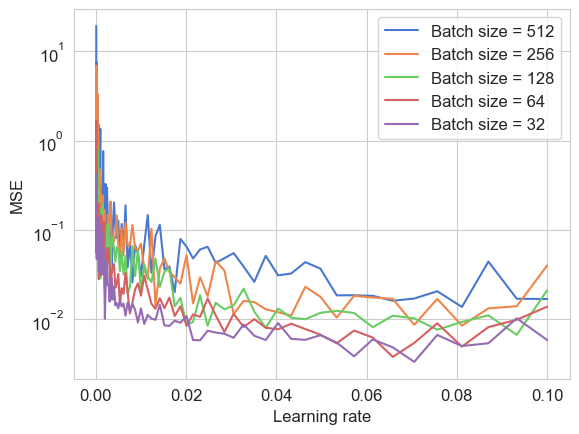

In [43]:
scores_batch_size = np.load('Results/Regression_own_code_scores_batch_size.npy')
learning_rates = np.load('Results/learning_rates_regression.npy')
batch_sizes = [32, 64, 128, 256, 512]

for i in range(len(scores_batch_size)-1, -1, -1):
    plt.plot(learning_rates, scores_batch_size[i, :], label=f'Batch size = {batch_sizes[i]}')
plt.xlabel('Learning rate', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(fontsize='large')
plt.semilogy()
plt.show()

### Learning rate

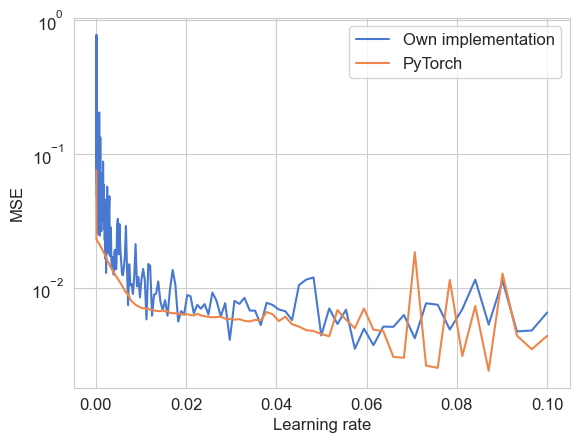

In [45]:
scores_learning_rate = np.load('Results/regression_own_code_learning_rate.npy')
scores_pytorch = np.load('Results/regression_pytorch_learning_rate.npy')
learning_rates = np.load('Results/learning_rates_regression_comparison.npy')

plt.plot(learning_rates, scores_learning_rate, label='Own implementation')
plt.plot(learning_rates, scores_pytorch, label='PyTorch')
plt.xlabel('Learning rate', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(fontsize='large')
plt.semilogy()
plt.show()

## Wisconsin Breast Cancer

In [7]:
one_layer = pd.read_csv('Results/gridsearch_wisconsin_50_epochs.csv')
two_layers = pd.read_csv('Results/gridsearch_wisconsin_two_layers_50_epochs.csv')

### One hidden layer

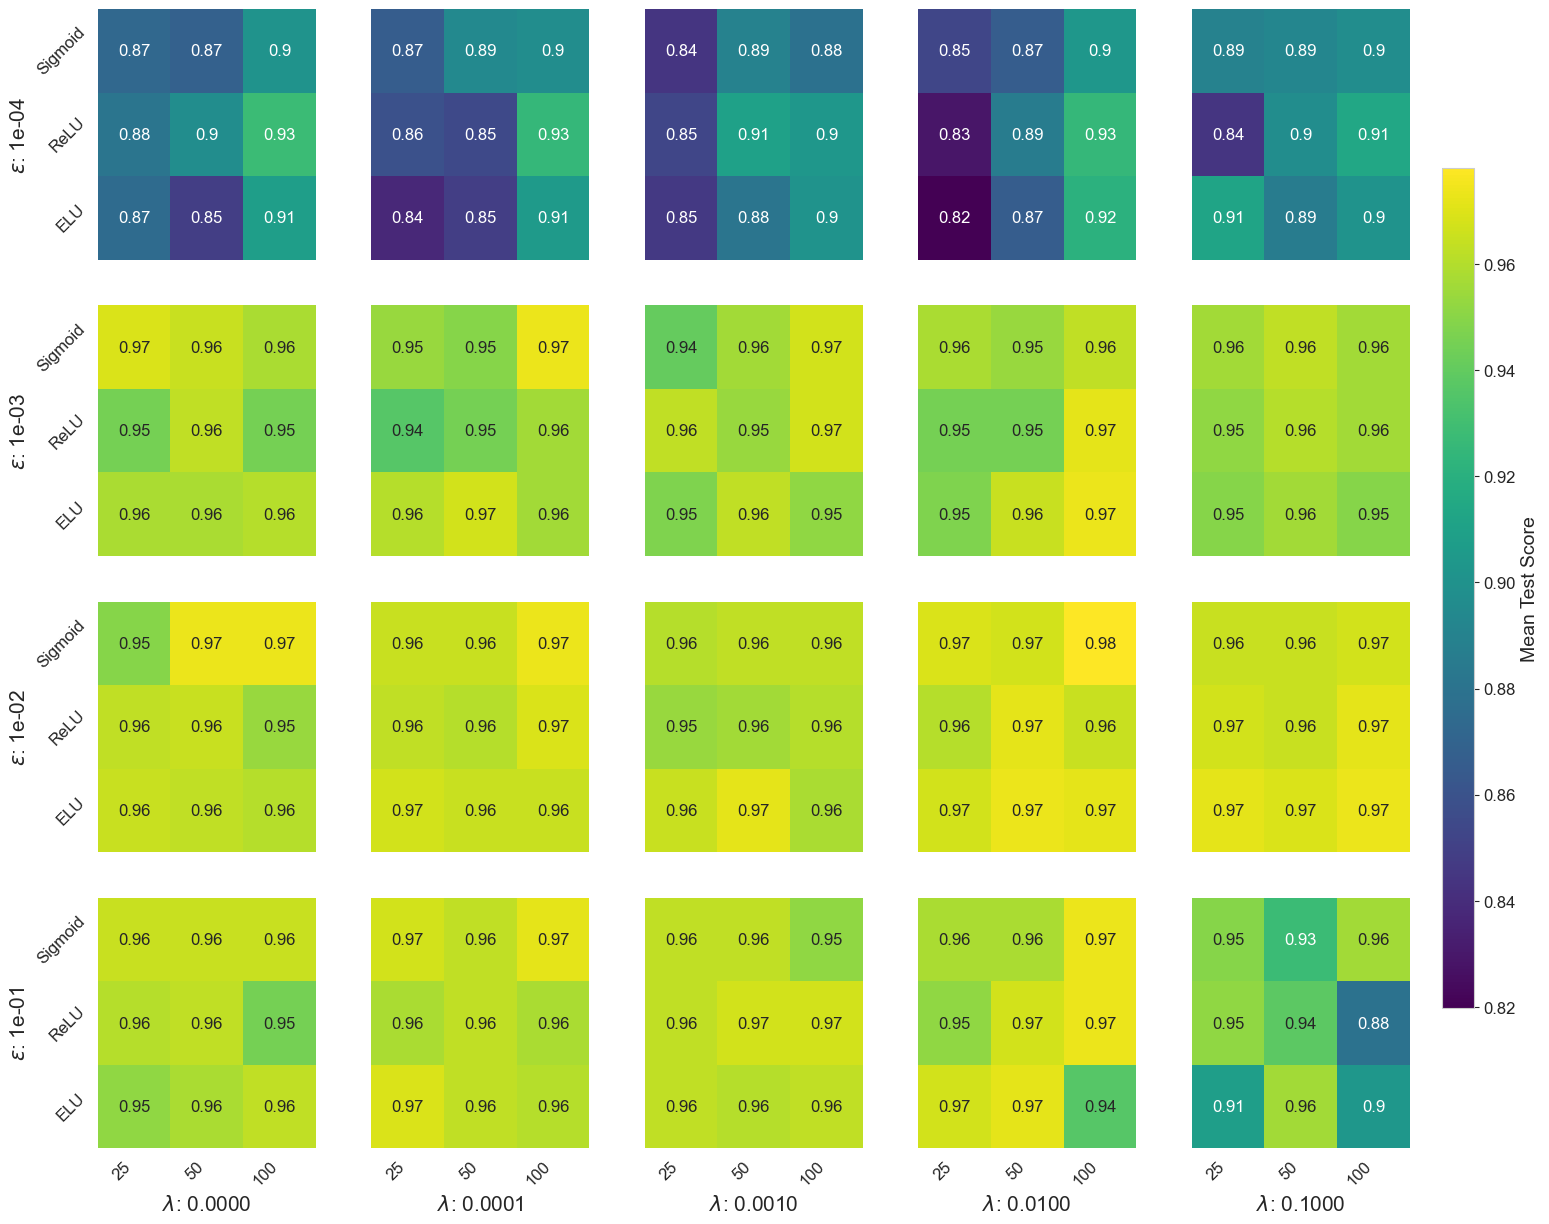

In [53]:
# Epsilon and lambda values
epsilon_vals = np.logspace(-4, -1, 4)
llambda_vals = [0.0, 0.0001, 0.001, 0.01, 0.1]

# List to collect all data for normalization
all_data = []

# Collect all data to find the global min and max for normalization
for epsilon in epsilon_vals:
    for llambda in llambda_vals:
        nodes_vs_activations = one_layer[(one_layer['param_model__epsilon'] == epsilon) & (one_layer['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)
        all_data.append(nodes_vs_activations_array)

# Find the global min and max for normalization
vmin = np.min([data.min() for data in all_data])
vmax = np.max([data.max() for data in all_data])
norm = Normalize(vmin=vmin, vmax=vmax)

# Create figure for the larger heatmap and colorbar
fig, axs = plt.subplots(4, 5, figsize=(16, 12))
fig.tight_layout()
fig.subplots_adjust(right=0.85) 
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])     # add axis for colorbar

# Define row and column names
row_names = ['Sigmoid', 'ReLU', 'ELU']
col_names = ['25', '50', '100']

# Plot each smaller heatmap in the larger heatmap cells
for idx, epsilon in enumerate(epsilon_vals):
    for idy, llambda in enumerate(llambda_vals):
        nodes_vs_activations = one_layer[(one_layer['param_model__epsilon'] == epsilon) & (one_layer['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)

        # Plotting the heatmap
        sns.heatmap(nodes_vs_activations_array, ax=axs[idx, idy], cbar=(idx==0 and idy==0), cbar_ax=cbar_ax if (idx==0 and idy==0) else None, 
                    norm=norm, annot=True, annot_kws={"fontsize":12}, cmap='viridis')

        # Adding column and row names for the heatmaps
        if idx == 3:
            axs[idx, idy].set_xticklabels(col_names, rotation=45, ha='right', fontsize=12)
        else: 
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_xticklabels([], rotation=45, ha='right', fontsize=12)
        if idy == 0:
            axs[idx, idy].set_yticklabels(row_names, rotation=45, ha='right', fontsize=12)
        else:
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_yticklabels([], rotation=45, ha='right', fontsize=12)

        # Set labels for lambda and epsilon values
        if idy == 0:
            axs[idx, idy].set_ylabel(rf'$\epsilon$: {epsilon:.0e}', fontsize=15)
        if idx == 3:
            axs[idx, idy].set_xlabel(rf'$\lambda$: {llambda:.4f}', fontsize=15)

# Set colorbar label
cbar = fig.colorbar(axs[0,0].collections[0], cax=cbar_ax)
cbar.set_label('Mean Test Score', fontsize=14)

plt.show()

### Two hidden layers

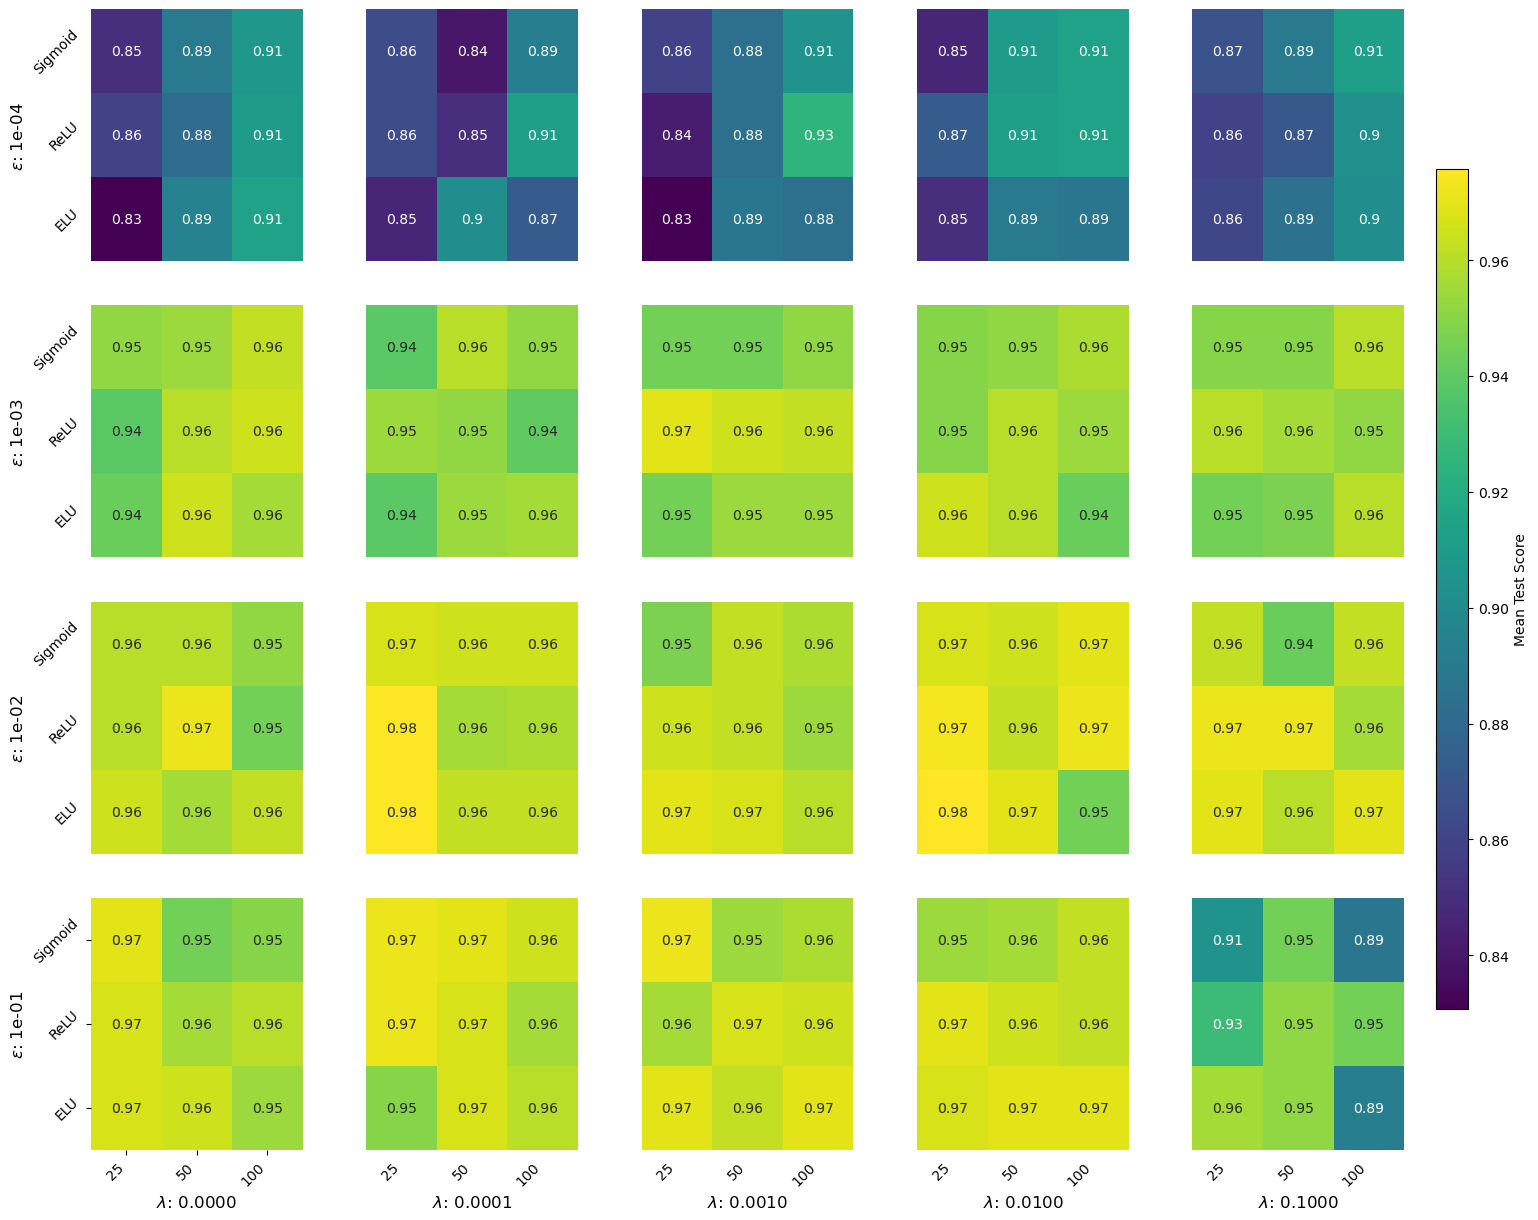

In [6]:
# Epsilon and lambda values
epsilon_vals = np.logspace(-4, -1, 4)
llambda_vals = [0.0, 0.0001, 0.001, 0.01, 0.1]

# List to collect all data for normalization
all_data = []

# Collect all data to find the global min and max for normalization
for epsilon in epsilon_vals:
    for llambda in llambda_vals:
        nodes_vs_activations = two_layers[(two_layers['param_model__epsilon'] == epsilon) & (two_layers['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)
        all_data.append(nodes_vs_activations_array)

# Find the global min and max for normalization
vmin = np.min([data.min() for data in all_data])
vmax = np.max([data.max() for data in all_data])
norm = Normalize(vmin=vmin, vmax=vmax)

# Create figure for the larger heatmap and colorbar
fig, axs = plt.subplots(4, 5, figsize=(16, 12))
fig.tight_layout()
fig.subplots_adjust(right=0.85, wspace=0.3) 
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])     # add axis for colorbar

# Define row and column names
row_names = ['Sigmoid', 'ReLU', 'ELU']
col_names = ['25', '50', '100']

# Plot each smaller heatmap in the larger heatmap cells
for idx, epsilon in enumerate(epsilon_vals):
    for idy, llambda in enumerate(llambda_vals):
        nodes_vs_activations = two_layers[(two_layers['param_model__epsilon'] == epsilon) & (two_layers['param_model__llambda'] == llambda)]
        nodes_vs_activations_array = nodes_vs_activations['mean_test_score'].to_numpy().reshape(3, 3)

        # Plotting the heatmap
        sns.heatmap(nodes_vs_activations_array, ax=axs[idx, idy], cbar=(idx==0 and idy==0), cbar_ax=cbar_ax if (idx==0 and idy==0) else None, 
                    norm=norm, annot=True, cmap='viridis')
        
        # Adding column and row names for the heatmaps
        if idx == 3:
            axs[idx, idy].set_xticklabels(col_names, rotation=45, ha='right')
        else: 
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_xticklabels([], rotation=45, ha='right')
        if idy == 0:
            axs[idx, idy].set_yticklabels(row_names, rotation=45, ha='right')
        else:
            axs[idx, idy].tick_params(left=False, bottom=False)
            axs[idx, idy].set_yticklabels([], rotation=45, ha='right')

        # Set labels for lambda and epsilon values
        if idy == 0:
            axs[idx, idy].set_ylabel(rf'$\epsilon$: {epsilon:.0e}', size='large')
        if idx == 3:
            axs[idx, idy].set_xlabel(rf'$\lambda$: {llambda:.4f}', size='large')

# Set colorbar label
cbar = fig.colorbar(axs[0,0].collections[0], cax=cbar_ax)
cbar.set_label('Mean Test Score')

plt.show()

### Learning rates

In [4]:
own_code = np.load('Results/Own_code_scores_lr.npy')
MLP_sklearn = np.load('Results/MLP_scores_lr.npy')
learning_rates = np.load('Results/learning_rates_comparison.npy')

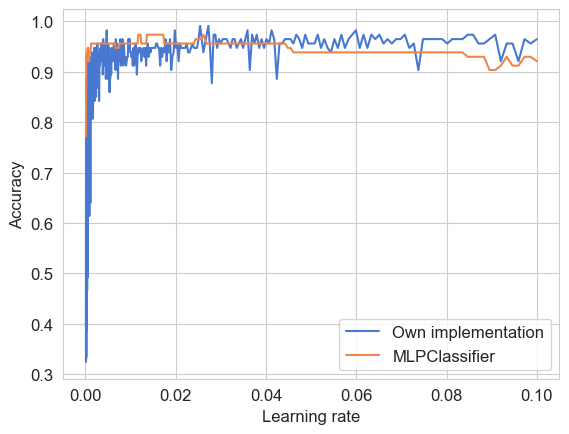

In [5]:
plt.plot(learning_rates, own_code, label='Own implementation')
plt.plot(learning_rates, MLP_sklearn, label='MLPClassifier')
plt.xlabel('Learning rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize='large')
plt.show()

### Batch size

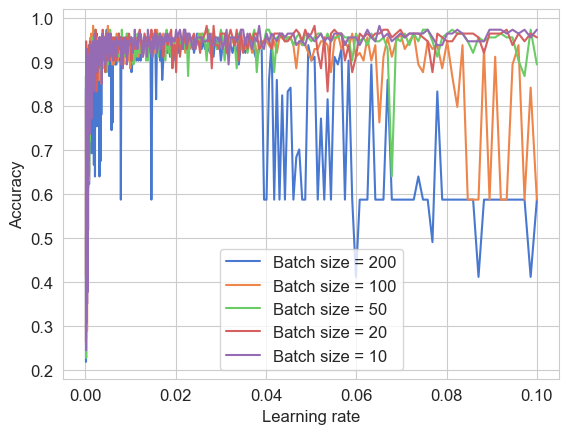

In [49]:
scores_batch_size = np.load('Results/Own_code_scores_batch_size.npy')
learning_rates = np.load('Results/learning_rates_comparison.npy')
batch_sizes = [10, 20, 50, 100, 200]

for i in range(len(scores_batch_size)-1, -1, -1):
    plt.plot(learning_rates, scores_batch_size[i, :], label=f'Batch size = {batch_sizes[i]}')
plt.xlabel('Learning rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize='large')
plt.show()

### Epoch size

Accuracy as a function of the epoch size for a batch size 10, learning rate 0.001, 50 nodes in the hidden layer and activation functions sigmoid and softmax.

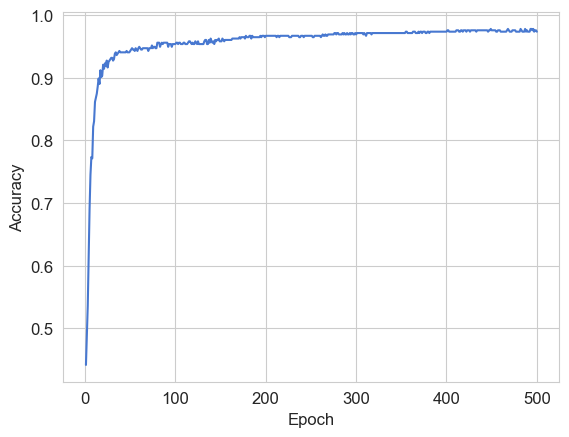

In [51]:
df = pd.read_csv('Results/epoch_size.csv')

plt.plot(np.linspace(1, 500, 500), df['Score'])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

### Logistic Regression

In [36]:
log_reg = pd.read_csv('Results/gridsearch_logistic_regression.csv')

[]

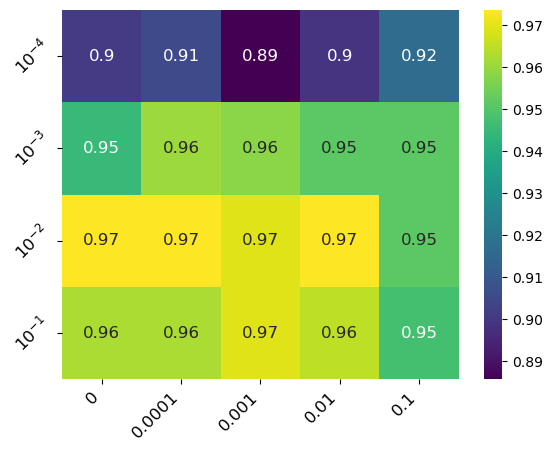

In [37]:
epsilon_vs_lambda = log_reg['mean_test_score'].to_numpy().reshape(4,5)

# Plotting the heatmap
g = sns.heatmap(epsilon_vs_lambda, annot=True, annot_kws={"fontsize":12}, cmap='viridis')

row_names = [r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$']
col_names = ['0', '0.0001', '0.001', '0.01', '0.1']

g.set_xticklabels(col_names, rotation=45, ha='right', fontsize=12)
g.set_yticklabels(row_names, rotation=45, ha='right', fontsize=12)

plt.plot()